dataset_link: https://www.kaggle.com/yasserh/titanic-dataset/metadata

Importing the Significant libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Creating the functions for reusability of code

In [2]:
def data_reading(file_path):
    '''It reads the data from a filename/filepath and returns the data to the user'''
    data = pd.read_csv(file_path)

    return data

In [3]:
def pre_processing(data):
    '''This program takes data from the user and returns the basic statistics of the data and the shape of the data'''
    return data.shape,data.describe()

In [4]:
def pie(feature , lables,title):
    '''This function takes the three arguments from the user there are features,labels and title'''
    plt.title(title)
    return plt.pie(feature.value_counts() , labels = lables,autopct = '%1.2f%%')

    

In [5]:
def surv_count(feature,val,data):
    '''This function takes the data from the user and provides the survival count'''
    fea = data.pivot_table(val,index = feature)
    fea = fea.mul(100).round(2)
    fea = fea.reset_index()
    
    return fea.values

In [6]:
def distribution_plot(data,x,kde,stat,col,hue):
    '''This functions takes the 6 arguments from the user there are data,x,kde,stat,col and hue
      kde is for kernal density, stat is for the probability and hue for color encoding'''
    return sns.displot(data,x=x,kde=kde,stat=stat,col=col,hue=hue)

In [7]:
def plot(keys ,x,y,values,title):
    '''This function provides the bar graph to user by considering the 5 arguments there are keys,x,y,values and title
    title is for giving the title to graph,x for x_label ,y is for y_label and keys and values for x and y axis'''
    plt.bar(keys, values, color ='tomato',width = 0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show()
    

In [8]:
def violin(x ,y , dataset , hue,title):
    '''This function provides the violin plot to user by considering the x,y,dataframe and hue
    hue for color encoding'''
    plt.title(title)
    return sns.violinplot(x = x, y = y , data = dataset,hue=hue)

In [9]:
def catplot(data , x,y ,hue ,col):
    '''This function provides the catplot to user by considering the 5 arguments there x,y dataframe,hue and col
    hue is for color encoding, x is for x axis and y is for y axis.'''
    return sns.catplot(data=data,x=x,y=y,hue=hue,col=col,)


In [11]:
data = data_reading("C://Users//Ravi teja//Downloads//archive//Titanic-Dataset.csv")
data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Here Main focus is survived column so first Plotting the data of survived column. Here I choosed the piechart for plotting because it summarizes the data in visuval form so we can easily understand the data insights.

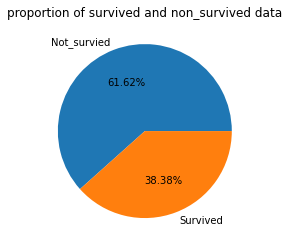

In [12]:
P = pie(data['Survived'] , ['Not_survied','Survived'],'proportion of survived and non_survived data')

Based upon above graph I understood that 61.62% people are not survived

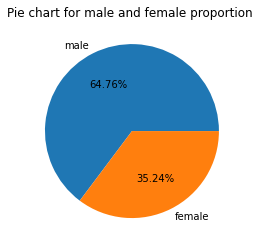

In [13]:
P = pie(data['Sex'] , ['male','female'],"Pie chart for male and female proportion ")

Calculating the survival count of female and male

In [14]:
surv_count("Sex","Survived",data)

array([['female', 74.2],
       ['male', 18.89]], dtype=object)

Taking the above values into diffrent lists

In [15]:
keys = ['female','male']
values = [74.2,18.89]

for better visuvalization purpose, here I used the bar graph on survival data of male and female proportion

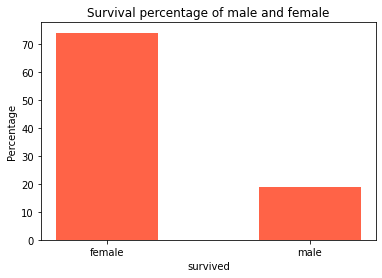

In [16]:
plot(keys ,"survived","Percentage", values,"Survival percentage of male and female")

Even male persons percentage is more compare to female in ship but Surprisingly we came to know that compare to male , female survival rate is high.

I am going to plot the distribution plot for age and survived columns beacuse here diffrent age group of people are there.
Distribution plot is comparing the group and range of data.

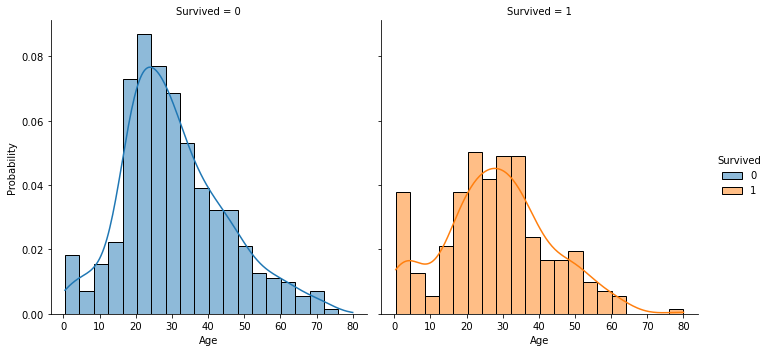

In [17]:

distribution_plot(data,"Age",True,"probability","Survived","Survived")


Based upon the above plot I came know that younger people Survival percentage is more compared to remaining other age people.

<AxesSubplot:title={'center':'graph'}, xlabel='Sex', ylabel='Age'>

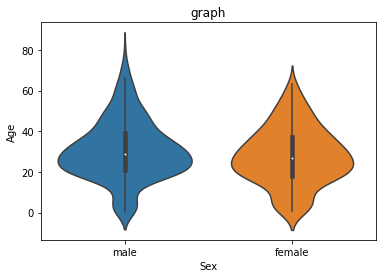

In [18]:
violin(x='Sex', y='Age', dataset=data,hue=None,title = "graph")

The plot represents the male and female people according to age. 20-40 age people are more in both female and male. However male proportion is more comapre to female

<AxesSubplot:title={'center':'Survival data of male and female according to age cateogry'}, xlabel='Sex', ylabel='Age'>

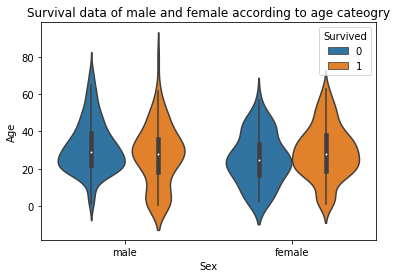

In [19]:
violin('Sex','Age', data,'Survived',"Survival data of male and female according to age cateogry")

Even though male people count is more but survival count is less in male and more in female. The main reason for selectin the violin plot is we can clearly see the which age cateory of people is more based upon the width.

Younger passengers more likely to survive

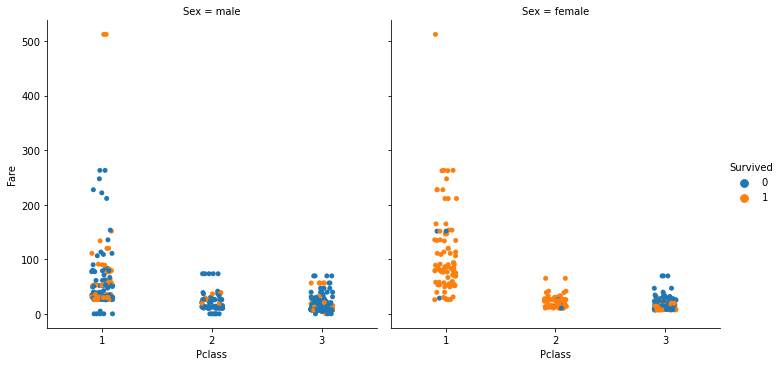

In [20]:
catplot(data,"Pclass","Fare","Survived","Sex")
# cat plot for sex,Pclass and survived columns to know highest survival rate in  Pclass and  Sex group

The above plot name is catplot. With this function, users can access several axes-level functions that illustrate the relationship between numerical values and one or more categorical variables using a variety of visual representations.

Based Upon above plot We observe that in females nearly 97% people are survived in Pclass 1. This is the majority section of survived compared to remainig one.